<a href="https://colab.research.google.com/github/VMBoehm/DeNoPa/blob/master/ClassificationWithsNVPs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

ROOT = "/content/gdrive"
drive.mount(ROOT, force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
%pylab inline
import pickle

Populating the interactive namespace from numpy and matplotlib


In [4]:
! pip install -q https://github.com/dfm/corner.py/archive/master.zip
import corner

     - 10.7MB 1.4MB/s


In [5]:
import tensorflow as tf
import tensorflow_probability as tfp
import tensorflow_hub as hub
tfd = tfp.distributions
tfb = tfp.bijectors
from tensorflow.contrib.distributions import softplus_inverse

W0602 16:03:13.007596 140471502022528 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [0]:
generator_path   = './gdrive/My Drive/InjectiveFlow/modules/decoder1/decoder'
encoder_path     = './gdrive/My Drive/InjectiveFlow/modules/encoder1/encoder'
nvp_func_path    = './gdrive/My Drive/InjectiveFlow/modules/nvp1/'
class_nvp_path   = './gdrive/My Drive/InjectiveFlow/modules/nvp_by_class/'
plot_path        = './gdrive/My Drive/InjectiveFlow/semi-supervised/plots/'
loss_path        = './gdrive/My Drive/InjectiveFlow/semi-supervised/losses/'

In [7]:
import gzip, zipfile, tarfile
import os, shutil, re, string, urllib, fnmatch
import pickle as pkl

def _download_mnist_realval(dataset):
    """
    Download the MNIST dataset if it is not present.
    :return: The train, test and validation set.
    """
    origin = (
        'http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz'
    )
    print('Downloading data from %s' % origin)
    urllib.request.urlretrieve(origin, dataset)

def _get_datafolder_path():
    full_path = os.path.abspath('.')
    path = full_path +'/data'
    return path

def load_mnist_realval(
        dataset=_get_datafolder_path()+'/mnist_real/mnist.pkl.gz'):
    '''
    Loads the real valued MNIST dataset
    :param dataset: path to dataset file
    :return: None
    '''
    if not os.path.isfile(dataset):
        datasetfolder = os.path.dirname(dataset)
        if not os.path.exists(datasetfolder):
            os.makedirs(datasetfolder)
        _download_mnist_realval(dataset)

    f = gzip.open(dataset, 'rb')
    train_set, valid_set, test_set = pkl.load(f, encoding='latin1')
    f.close()
    x_train, targets_train = train_set[0], train_set[1]
    x_valid, targets_valid = valid_set[0], valid_set[1]
    x_test, targets_test = test_set[0], test_set[1]
    return x_train, targets_train, x_valid, targets_valid, x_test, targets_test
  
x_train, targets_train, x_valid, targets_valid, x_test, targets_test = load_mnist_realval()

In [0]:
data_dim    = 28*28
batch_size  = 16
hidden_size = 10
n_channels  = 1
label = 'class_nvp'

In [9]:
tf.reset_default_graph()

nvps          = [] 
lr            = tf.placeholder_with_default(0.001,shape=[])

encoder       = hub.Module(encoder_path, trainable=False)

for ii in range(10):
  nvps+=[hub.Module(class_nvp_path+'nvp_%d/'%ii, trainable=False)]

x_tr          = tf.placeholder(shape=[batch_size,data_dim,n_channels], dtype=tf.float32)

mu            = encoder(tf.reshape(x_tr,[-1,28,28,n_channels]))

log_likes = []
for nvp in nvps:
  log_likes+=[nvp({'z_sample':mu,'sample_size':1,'u_sample':np.zeros((1, hidden_size))},as_dict=True)['log_prob']]




# ---------------------------end train nvp ----------------- #

#comment train nvp above section above and uncomment this for loading the trained module



Instructions for updating:
Colocations handled automatically by placer.


W0602 16:03:19.888059 140471502022528 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/control_flow_ops.py:3632: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0602 16:03:41.895846 140471502022528 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0602 16:03:42.268178 140471502022528 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0602 16:03:43.040260 140471502022528 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0602 16:03:43.461637 140471502022528 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0602 16:03:43.876801 140471502022528 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0602 16:03:44.293855 140471502022528 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0602 16:03:44.729554 140471502022528 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0602 16:03:45.167434 140471502022528 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0602 16:03:46.043784 140471502022528 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0602 16:03:46.505229 140471502022528 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0602 16:03:46.976268 140471502022528 saver.py:1483] Saver not created because there are no variables in the graph to restore


In [0]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

**Training of the NVP**

In [59]:
mean_loss=[]
for ii in range(10):
  data_class = ii
  indices = np.where(targets_test==data_class)
  print(len(indices[0]))
  nvp_loss = pickle.load(open(loss_path+'class%d.pkl'%data_class,'rb'))
  mean_loss+=[np.mean(nvp_loss[::-len(indices[0])])]
print(mean_loss)
mean_loss=np.expand_dims(np.asarray(mean_loss),0)
norm=np.sum(mean_loss)
print(mean_loss/norm)



980
1135
1032
1010
982
892
958
1028
974
1009
[14.263117, 8.576102, 16.051311, 15.003335, 15.635943, 14.977023, 13.633031, 12.757795, 14.484809, 12.842262]
[[0.10318788 0.06204463 0.11612474 0.10854306 0.11311972 0.1083527
  0.09862946 0.09229749 0.10479173 0.09290857]]


1009
[9]
[9]
[9]
[9]
[9]
[9]
[9]
[9]
[9]
[9]
[9]
[5]
[9]
[9]
[9]
[9]
0.8712911
0.7968215
1.2595844
1.0539976
0.5913498
1.0161138
1.6503304
0.8564713
1.2746425
1.3995863
0.92475414
0.7752704
0.9414828
0.25959373
0.787123
1.4382789


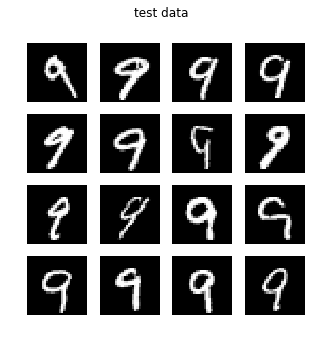

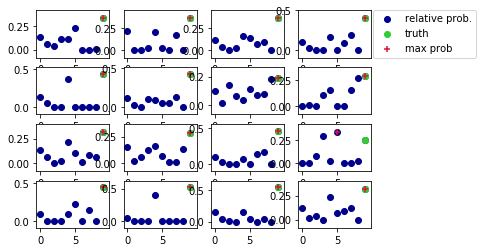

In [73]:
data_class = 9
indices = np.where(targets_test==data_class)
x_test_class = x_test[indices]
print(len(x_test_class))
probs = sess.run(log_likes, feed_dict={x_tr:np.expand_dims(x_test_class[0:16],-1)})

figure(figsize=(5,5))
suptitle('test data')
for i in range(16):
    subplot(4,4,i+1)
    imshow(np.reshape(x_test_class[i,:],(28,28)),cmap='gray',vmin=0); #colorbar()
    axis('off')
plt.savefig(plot_path+'test_data_%d.png'%data_class, bbox_inches='tight')

probs=np.asarray(probs)
probs[np.where(np.isnan(probs))]=-np.inf 
probs = probs.T/mean_loss
inds =[]
for ii in range(16):
  minimum = max(probs[ii])
  ind = np.where(probs[ii]==minimum)[0]
  print(ind)
  inds+=[ind]
  
plt.figure()
for ii in range(16):
  subplot(4,4,ii+1)
  norm = np.sum(np.exp(probs[ii]))
  print(norm)
  ind=inds[ii]
  plt.scatter(np.arange(10),np.exp(probs[ii])/norm, label='relative prob.', color='darkblue')
  plt.scatter(data_class,np.exp(probs[ii][data_class])/norm, color='limegreen', label='truth')
  plt.scatter(ind,np.exp(probs[ii][ind])/norm, color='crimson',marker='+',label='max prob')
plt.legend(loc=(1.02,3.6))
plt.savefig(plot_path+'classification_%d_corrected.png'%data_class, bbox_inches='tight')

982
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
[4]
0.5350001
0.2741634
0.71232486
0.76385564
0.47438133
0.618242
0.5420847
0.26750112
0.48580003
0.41261896
0.7322891
0.37534472
0.25394332
0.14757343
0.35598615
0.6228263


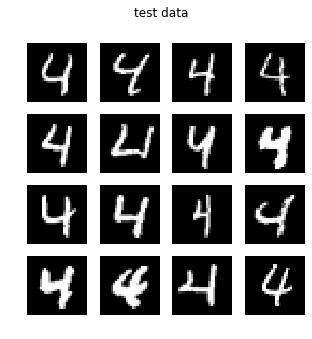

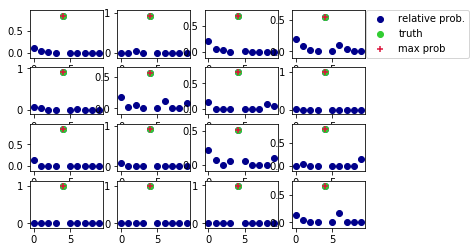

In [78]:
data_class = 4
indices = np.where(targets_test==data_class)
x_test_class = x_test[indices]
print(len(x_test_class))
probs = sess.run(log_likes, feed_dict={x_tr:np.expand_dims(x_test_class[0:16],-1)})

figure(figsize=(5,5))
suptitle('test data')
for i in range(16):
    subplot(4,4,i+1)
    imshow(np.reshape(x_test_class[i,:],(28,28)),cmap='gray',vmin=0); #colorbar()
    axis('off')
plt.savefig(plot_path+'test_data_%d.png'%data_class, bbox_inches='tight')

probs=np.asarray(probs)
probs[np.where(np.isnan(probs))]=-np.inf 
probs = probs.T/mean_loss
inds =[]
for ii in range(16):
  minimum = max(probs[ii])
  ind = np.where(probs[ii]==minimum)[0]
  print(ind)
  inds+=[ind]
  
plt.figure()
for ii in range(16):
  subplot(4,4,ii+1)
  norm = np.sum(np.exp(probs[ii]))
  print(norm)
  ind=inds[ii]
  plt.scatter(np.arange(10),np.exp(probs[ii])/norm, label='relative prob.', color='darkblue')
  plt.scatter(data_class,np.exp(probs[ii][data_class])/norm, color='limegreen', label='truth')
  plt.scatter(ind,np.exp(probs[ii][ind])/norm, color='crimson',marker='+',label='max prob')
plt.legend(loc=(1.02,3.6))
plt.savefig(plot_path+'classification_%d_corrected.png'%data_class, bbox_inches='tight')

In [79]:
mean_loss

array([[14.263117,  8.576102, 16.051311, 15.003335, 15.635943, 14.977023,
        13.633031, 12.757795, 14.484809, 12.842262]], dtype=float32)

1032
[2]
[2]
[2]
[4]
[2]
[2]
[2]
[4]
[2]
[2]
[2]
[4]
[2]
[2]
[2]
[3]
0.52409333
0.31375924
0.31034607
0.4141548
0.6361582
0.119377986
0.4060708
0.22159818
0.777701
0.3868617
0.28090993
0.9024933
0.08229455
0.86069745
0.59260744
0.41893524


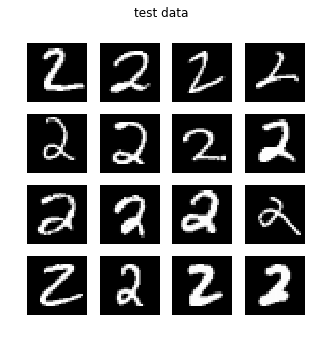

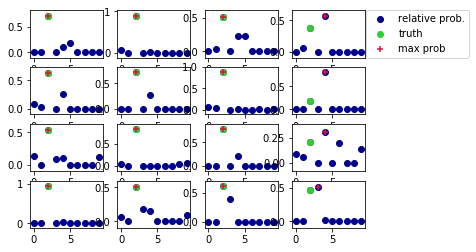

In [81]:
data_class = 2
indices = np.where(targets_test==data_class)
x_test_class = x_test[indices]
print(len(x_test_class))
probs = sess.run(log_likes, feed_dict={x_tr:np.expand_dims(x_test_class[0:16],-1)})

figure(figsize=(5,5))
suptitle('test data')
for i in range(16):
    subplot(4,4,i+1)
    imshow(np.reshape(x_test_class[i,:],(28,28)),cmap='gray',vmin=0); #colorbar()
    axis('off')
plt.savefig(plot_path+'test_data_%d.png'%data_class, bbox_inches='tight')

probs=np.asarray(probs)
probs[np.where(np.isnan(probs))]=-np.inf 
probs = probs.T/mean_loss
inds =[]
for ii in range(16):
  minimum = max(probs[ii])
  ind = np.where(probs[ii]==minimum)[0]
  print(ind)
  inds+=[ind]
  
plt.figure()
for ii in range(16):
  subplot(4,4,ii+1)
  norm = np.sum(np.exp(probs[ii]))
  print(norm)
  ind=inds[ii]
  plt.scatter(np.arange(10),np.exp(probs[ii])/norm, label='relative prob.', color='darkblue')
  plt.scatter(data_class,np.exp(probs[ii][data_class])/norm, color='limegreen', label='truth')
  plt.scatter(ind,np.exp(probs[ii][ind])/norm, color='crimson',marker='+',label='max prob')
plt.legend(loc=(1.02,3.6))
plt.savefig(plot_path+'classification_%d_uncorrected.png'%data_class, bbox_inches='tight')

1135
[1]
[1]
[3]
[1]
[1]
[1]
[1]
[1]
[4]
[1]
[1]
[1]
[4]
[1]
[1]
[1]
1.3818264
1.2275146
0.994666
0.8406539
1.4752206
1.4199616
1.1866889
1.5390563
0.31202734
0.7154024
1.3346263
0.3368994
0.42162758
0.95694906
0.99468344
1.0357982


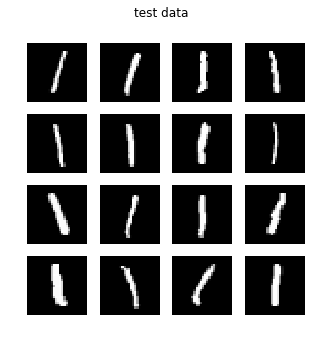

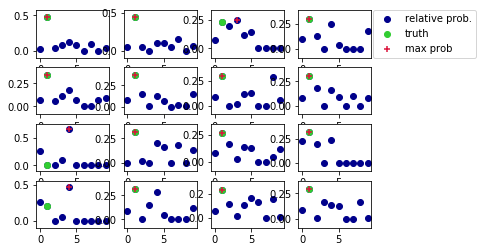

In [77]:
data_class = 1
indices = np.where(targets_test==data_class)
x_test_class = x_test[indices]
print(len(x_test_class))
probs = sess.run(log_likes, feed_dict={x_tr:np.expand_dims(x_test_class[0:16],-1)})

figure(figsize=(5,5))
suptitle('test data')
for i in range(16):
    subplot(4,4,i+1)
    imshow(np.reshape(x_test_class[i,:],(28,28)),cmap='gray',vmin=0); #colorbar()
    axis('off')
plt.savefig(plot_path+'test_data_%d.png'%data_class, bbox_inches='tight')

probs=np.asarray(probs)
probs[np.where(np.isnan(probs))]=-np.inf 
probs = probs.T/mean_loss
inds =[]
for ii in range(16):
  minimum = max(probs[ii])
  ind = np.where(probs[ii]==minimum)[0]
  print(ind)
  inds+=[ind]
  
plt.figure()
for ii in range(16):
  subplot(4,4,ii+1)
  norm = np.sum(np.exp(probs[ii]))
  print(norm)
  ind=inds[ii]
  plt.scatter(np.arange(10),np.exp(probs[ii])/norm, label='relative prob.', color='darkblue')
  plt.scatter(data_class,np.exp(probs[ii][data_class])/norm, color='limegreen', label='truth')
  plt.scatter(ind,np.exp(probs[ii][ind])/norm, color='crimson',marker='+',label='max prob')
plt.legend(loc=(1.02,3.6))
plt.savefig(plot_path+'classification_%d_corrected.png'%data_class, bbox_inches='tight')